<b><h1 style="color:blue;">CONTEXT</h1><b><br/>

How do you estimate the co2 emission from cars?<br/><br/>
    Features including model, make, vehicle type, engine size,Transmission, fuel consumption etc impacts on the co2 emission.<br/><br/>
    In this case study it is our task to design a ML model to predict the co2 emissions by cars based on the data given.<br/><br/>
    We will follow step by step approach from data importing to plotting the model and explore the basics of data science!


<b><big>Reading the data</big></b><br/>
The data has one file "co2emission.csv". This file contains 679 car co2 emision data.

## Data description
The business meaning of each column in the data is as below

* <b>Model Year</b>: indicates the specific version of the car model.
* <b>Make</b>: The brand name of the car.
* <b>Nodel</b>:The specific Name Range of car.
* <b>Vehicle class</b>: Cars as categorized into classes.
* <b>Engine Size</b>: It is the volume of fuel and air that can be pushed through a car's cylinders and is measured in cubic centimetres (cc)
* <b>Cylinder</b>: No of cylinders.
* <b>Transmission Type</b>: Type of transmission system in the car.
* <b>Fuel class</b>: The fuel class type used.
* <b>Fuel consumption</b>: The amount of fuel consumption.
* <b>Additional Fuel consumption I</b>: The amount of additional fuel consumptions.
* <b>Additional Fuel consumption II</b>: The amount of additional fuel consumptions.
* <b>Additional Fuel consumption III</b>: The amount of additional fuel consumptions.
* <b>CO2 Emission</b>: The amount of co2 emission. It is the <b> Target Variable! </b>

In [2]:
import numpy as np
import pandas as pd

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [53]:
# Use pandas to read a csv file by prodiving the path of file to read_csv() function
# Many other formats are available e.g read_excel(), read_table(), read_json etc. 
# these options can be seen using dot tab option
# The output of read_csv function here is stored as a DataFrame
carEmission=pd.read_csv(filepath_or_buffer="D:\Data Scienece\IVY PRO\Python\Python Datasets\Python Datasets\external\Cars\co2emission.csv"
, 
                              sep=',', encoding='latin-1')

# Controlling data display options
pd.options.display.max_columns=30
pd.set_option('max_rows',2000)
print('Shape before deleting duplicate values:', carEmission.shape)

# Removing duplicate rows if any
carEmission=carEmission.drop_duplicates()
print('Shape After deleting duplicate values:', carEmission.shape)

# Printing few records of the data
carEmission.head(n=10)

Shape before deleting duplicate values: (679, 13)
Shape After deleting duplicate values: (679, 13)


,MODEL YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE_SIZE,CYLINDERS,TRANSMISSION TYPE,FUEL CLASS,FUEL_CONSUMPTION,ADDITIONAL FUEL CONSUMPTION I,ADDITIONAL FUEL CONSUMPTION II,ADDITIONAL FUEL CONSUMPTION III,CO2_EMISSIONS
0,2001,ACURA,1.7EL,COMPACT,1.7,4,A4,X,9.3,7.2,8.3,34,191
1,2001,ACURA,1.7EL,COMPACT,1.7,4,M5,X,8.9,7.4,8.3,34,191
2,2001,ACURA,3.2CL,COMPACT,3.2,6,AS5,Z,13.7,8.8,11.5,25,265
3,2001,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.8,8.8,11.6,24,267
4,2001,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,10.9,13.1,22,301
5,2001,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,8.5,10.1,28,232
6,2001,ACURA,INTEGRA,SUBCOMPACT,1.8,4,M5,X,10.6,8.3,9.6,29,221
7,2001,ACURA,INTEGRA GS-R,SUBCOMPACT,1.8,4,M5,Z,10.8,8.5,9.7,29,223
8,2001,ACURA,MDX,SUV,3.5,6,A5,Z,15.5,11.1,13.5,21,311
9,2001,ACURA,NSX,TWO-SEATER,3.0,6,AS4,Z,15.3,10.9,13.3,21,306


<b>DATA CLEANING</b>

In [63]:
carEmission.replace('\s+','',regex=True,inplace=True)
carEmission.columns = carEmission.columns.str.replace('\s+','',regex=True)

# Defining the problem statement: 
#### Create a ML model which can predict the co2 emission of a Car
* Target Variable: CO2_EMISSIONS
* Predictors: MAKE, MODEL, ENGINE_SIZE, CYLINDERS etc.

# Determining the type of Machine Learning
Based on the problem statement you can understand that we need to create a <b>supervised ML Regression model</b>, as the target variable is Continuous.

<AxesSubplot:>

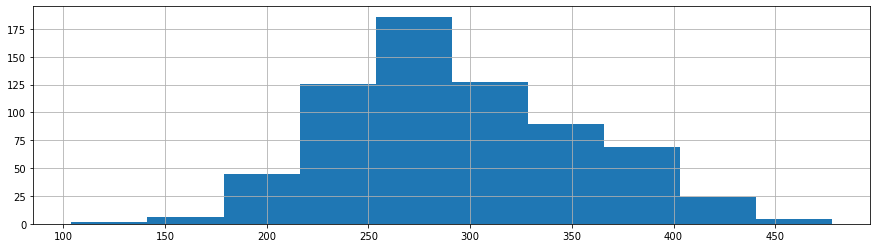

In [64]:
%matplotlib inline
# Creating Bar chart as the Target variable is Continuous
carEmission['CO2_EMISSIONS'].hist(figsize=(15,4))

The data distribution of the target variable follows a normal or bell curve. There are sufficient number of rows for each type of values to learn from.

# Basic Data Exploration

In [71]:
carEmission.sample(n=5,
    frac=None,
    replace=False,
    weights=None,
    random_state=56,
    axis=0)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINE_SIZE,CYLINDERS,TRANSMISSIONTYPE,FUELCLASS,FUEL_CONSUMPTION,ADDITIONALFUELCONSUMPTIONI,ADDITIONALFUELCONSUMPTIONII,ADDITIONALFUELCONSUMPTIONIII,CO2_EMISSIONS
530,2001,SAAB,9-3TURBO#,MID-SIZE,2.3,4,M5,Z,13.0,8.3,10.9,26,251
239,2001,FORD,E150VAN,VAN-CARGO,5.4,8,A4,X,17.9,13.3,15.8,18,363
624,2001,VOLKSWAGEN,GOLF,COMPACT,2.0,4,A4,X,11.9,9.0,10.6,27,244
469,2001,NISSAN,FRONTIER,PICKUPTRUCK-STANDARD,2.4,4,M5,X,12.0,10.1,11.1,25,255
27,2001,AUDI,ALLROAD,SUV,2.7,6,M6,Z,16.5,12.2,14.6,19,336


In [65]:
carEmission.nunique()

MODELYEAR                         1
MAKE                             34
MODEL                           351
VEHICLECLASS                     14
ENGINE_SIZE                      45
CYLINDERS                         7
TRANSMISSIONTYPE                  8
FUELCLASS                         5
FUEL_CONSUMPTION                118
ADDITIONALFUELCONSUMPTIONI       90
ADDITIONALFUELCONSUMPTIONII     121
ADDITIONALFUELCONSUMPTIONIII     30
CO2_EMISSIONS                   123
dtype: int64

In [66]:
carEmission.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679 entries, 0 to 678
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   MODELYEAR                     679 non-null    int64  
 1   MAKE                          679 non-null    object 
 2   MODEL                         679 non-null    object 
 3   VEHICLECLASS                  679 non-null    object 
 4   ENGINE_SIZE                   679 non-null    float64
 5   CYLINDERS                     679 non-null    int64  
 6   TRANSMISSIONTYPE              679 non-null    object 
 7   FUELCLASS                     679 non-null    object 
 8   FUEL_CONSUMPTION              679 non-null    float64
 9   ADDITIONALFUELCONSUMPTIONI    679 non-null    float64
 10  ADDITIONALFUELCONSUMPTIONII   679 non-null    float64
 11  ADDITIONALFUELCONSUMPTIONIII  679 non-null    int64  
 12  CO2_EMISSIONS                 679 non-null    int64  
dtypes: fl

In [67]:
carEmission.describe(include='all')

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINE_SIZE,CYLINDERS,TRANSMISSIONTYPE,FUELCLASS,FUEL_CONSUMPTION,ADDITIONALFUELCONSUMPTIONI,ADDITIONALFUELCONSUMPTIONII,ADDITIONALFUELCONSUMPTIONIII,CO2_EMISSIONS
count,679.0,679,679,679,679.000000,679.000000,679,679,679.000000,679.000000,679.000000,679.000000,679.000000
unique,NaN,34,351,14,NaN,NaN,8,5,NaN,NaN,NaN,NaN,NaN
top,NaN,FORD,RAM1500,COMPACT,NaN,NaN,A4,X,NaN,NaN,NaN,NaN,NaN
freq,NaN,63,9,145,NaN,NaN,312,442,NaN,NaN,NaN,NaN,NaN
mean,2001.0,NaN,NaN,NaN,3.252577,5.798233,NaN,NaN,14.591900,10.613844,12.802798,23.107511,293.656848
std,0.0,NaN,NaN,NaN,1.203751,1.531073,NaN,NaN,3.025654,2.357724,2.685590,5.308083,60.372456
min,2001.0,NaN,NaN,NaN,1.000000,3.000000,NaN,NaN,4.900000,4.000000,4.500000,14.000000,104.000000
25%,2001.0,NaN,NaN,NaN,2.200000,4.000000,NaN,NaN,12.700000,9.000000,11.000000,19.000000,253.000000
50%,2001.0,NaN,NaN,NaN,3.000000,6.000000,NaN,NaN,14.300000,10.100000,12.300000,23.000000,283.000000
75%,2001.0,NaN,NaN,NaN,4.200000,6.000000,NaN,NaN,16.650000,12.500000,14.850000,26.000000,340.000000


# Basic Data Exploration Results

* <b>Model Year</b>: Categorical,<b>Rejected</b> since its has only one unique value.
* <b>Make</b>: nominal Categorical,selected.
* <b>Nodel</b>:nominal Categorical,selected.
* <b>Vehicle class</b>: nominal Categorical,selected.
* <b>Engine Size</b>: continous,selected
* <b>Cylinder</b>: ordinal categorical,selected
* <b>Transmission Type</b>: nominal Categorical,selected.
* <b>Fuel class</b>: nominal Categorical,selected.
* <b>Fuel consumption</b>: continous,selected
* <b>Additional Fuel consumption I</b>: continous,selected
* <b>Additional Fuel consumption II</b>: continous,selected
* <b>Additional Fuel consumption III</b>: continous,selected
* <b>CO2 Emission</b>: continous,selected <b> Target Variable! </b>

# Removing useless columns from the data

In [72]:
carEmission=carEmission.drop(columns=['MODELYEAR'])

In [75]:
carEmission.sample(n=5,
    random_state=5,
    axis=0)

,MAKE,MODEL,VEHICLECLASS,ENGINE_SIZE,CYLINDERS,TRANSMISSIONTYPE,FUELCLASS,FUEL_CONSUMPTION,ADDITIONALFUELCONSUMPTIONI,ADDITIONALFUELCONSUMPTIONII,ADDITIONALFUELCONSUMPTIONIII,CO2_EMISSIONS
250,FORD,EXSPORTTRAC4X4,PICKUPTRUCK-STANDARD,4.0,6,A5,X,17.4,13.1,15.5,18,357
104,CHEVROLET,CAMARO,SUBCOMPACT,3.8,6,A4,X,13.7,8.5,11.4,25,262
379,JEEP,CHEROKEE4X4,SUV,4.0,6,A4,X,17.3,12.8,15.3,18,352
132,CHEVROLET,MONTECARLO,MID-SIZE,3.4,6,A4,X,12.5,8.0,10.4,27,239
673,VOLVO,V70T5WAGONTURBO,STATIONWAGON-MID-SIZE,2.3,5,AS5,Z,13.4,9.8,11.8,24,271


# Visual Exploratory Data Analysis
* Categorical variables: Bar plot
* Continuous variables: Histogram

<b><big>UNIVARIATE ANALYSIS</big> </B>

In [79]:
%matplotlib inline
import MyLibrary

In [80]:
from MyLibrary import newfunction

In [81]:
carEmission.columns

Index(['MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINE_SIZE', 'CYLINDERS',
       'TRANSMISSIONTYPE', 'FUELCLASS', 'FUEL_CONSUMPTION',
       'ADDITIONALFUELCONSUMPTIONI', 'ADDITIONALFUELCONSUMPTIONII',
       'ADDITIONALFUELCONSUMPTIONIII', 'CO2_EMISSIONS'],
      dtype='object')

array([[<AxesSubplot:title={'center':'ENGINE_SIZE'}>,
        <AxesSubplot:title={'center':'FUEL_CONSUMPTION'}>],
       [<AxesSubplot:title={'center':'ADDITIONALFUELCONSUMPTIONI'}>,
        <AxesSubplot:title={'center':'ADDITIONALFUELCONSUMPTIONII'}>],
       [<AxesSubplot:title={'center':'ADDITIONALFUELCONSUMPTIONIII'}>,
        <AxesSubplot:title={'center':'CO2_EMISSIONS'}>]], dtype=object)

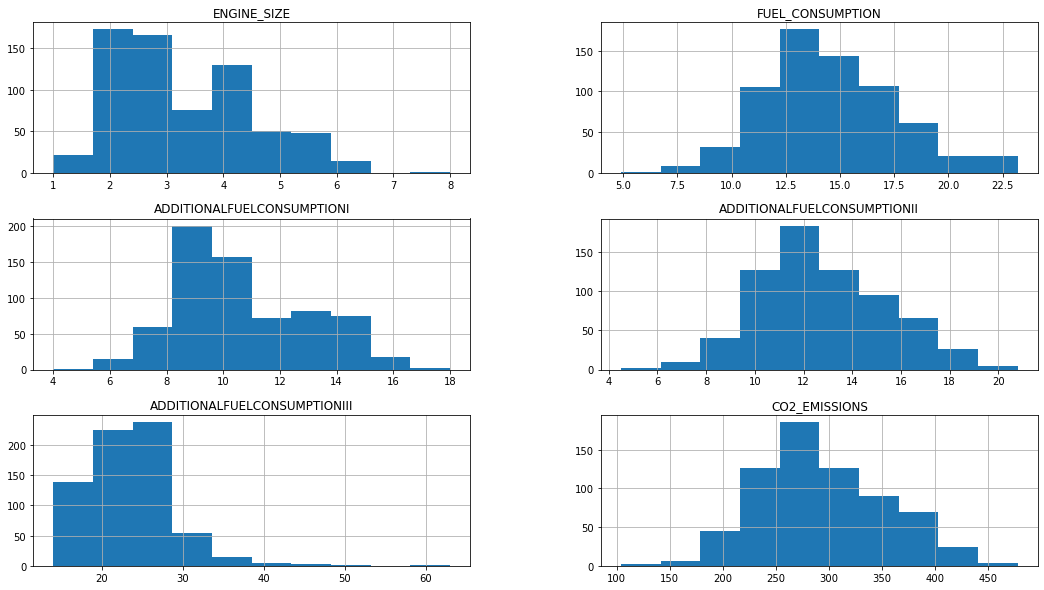

In [107]:
# Calling the function
# Plotting histograms of multiple columns together
carEmission.hist(['ENGINE_SIZE','FUEL_CONSUMPTION',
       'ADDITIONALFUELCONSUMPTIONI', 'ADDITIONALFUELCONSUMPTIONII',
       'ADDITIONALFUELCONSUMPTIONIII', 'CO2_EMISSIONS'], figsize=(18,10))

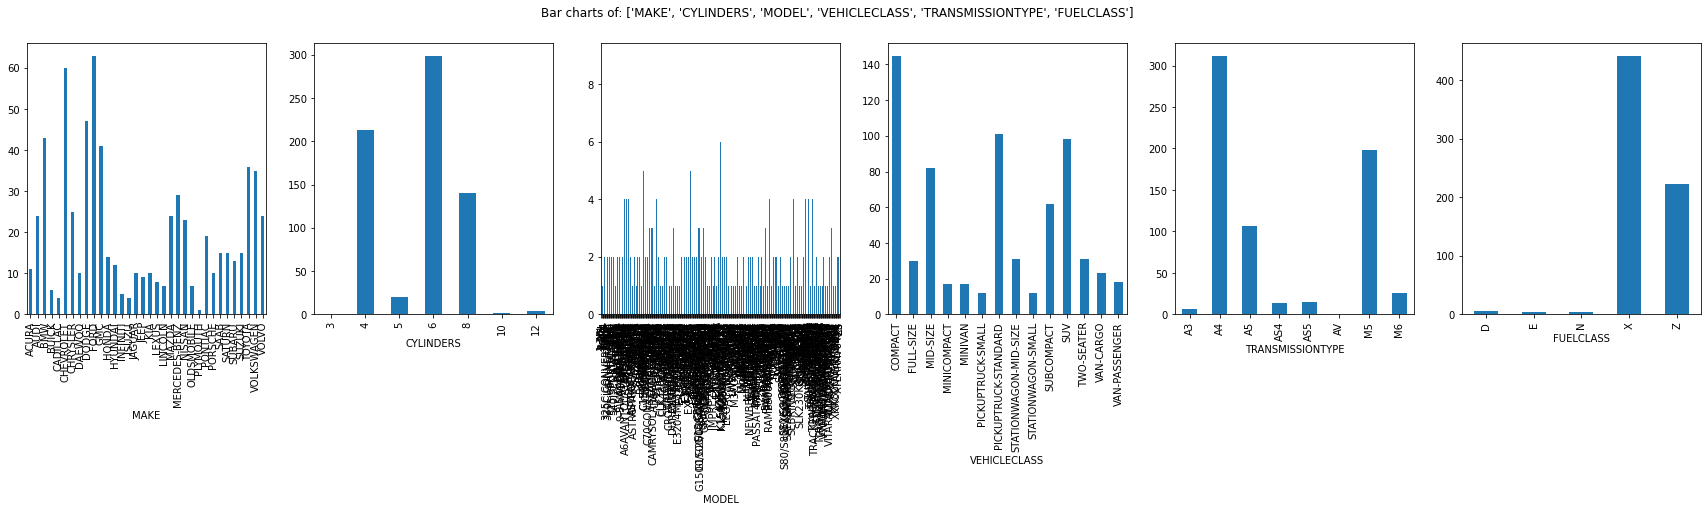

In [106]:
# Calling the function
newfunction.PlotBarCharts(inpData=carEmission, colsToPlot=['MAKE','CYLINDERS','MODEL', 'VEHICLECLASS',
       'TRANSMISSIONTYPE', 'FUELCLASS'])

# Feature Selection

<b><big>BIVARIATE ANALYSIS</big> </B>

## Visual exploration of relationship between variables

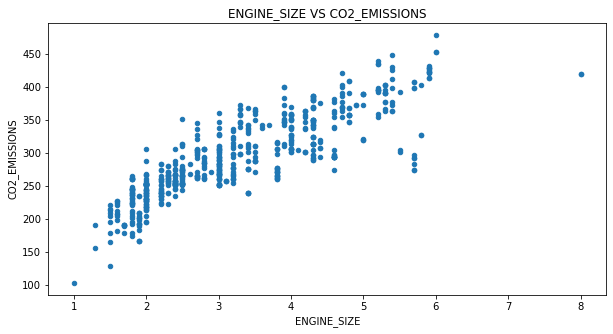

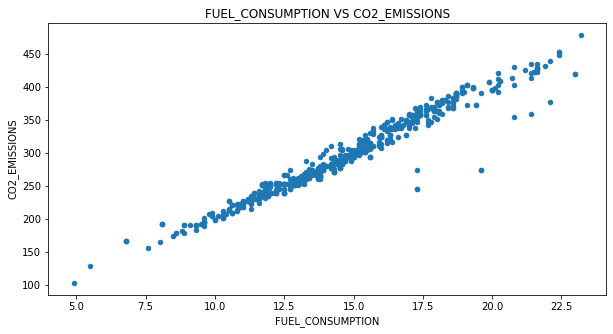

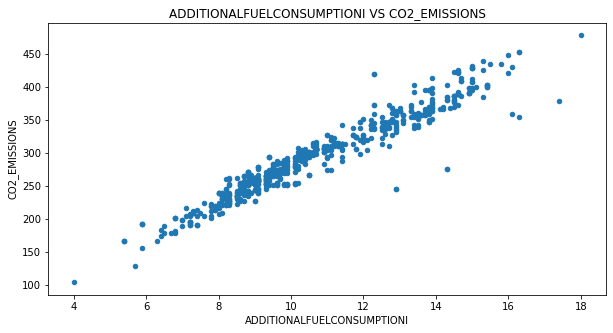

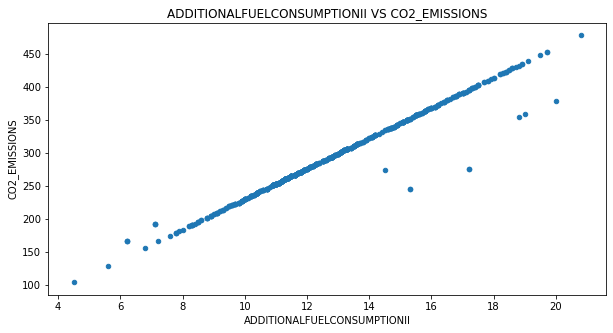

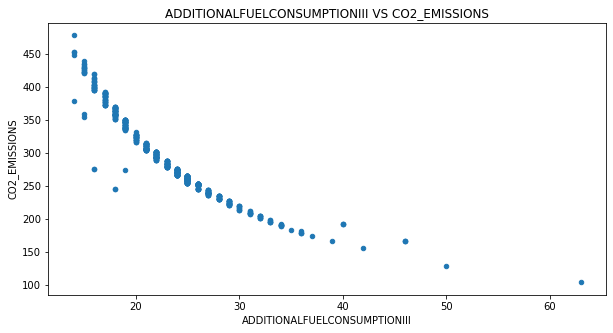

In [109]:
ContinuousCols=['ENGINE_SIZE','FUEL_CONSUMPTION',
       'ADDITIONALFUELCONSUMPTIONI', 'ADDITIONALFUELCONSUMPTIONII',
       'ADDITIONALFUELCONSUMPTIONIII' ]

# Calling the function
MyLibrary.newfunction.PlotscatterCharts(inp=carEmission,ContinuousCols=ContinuousCols,yname='CO2_EMISSIONS')

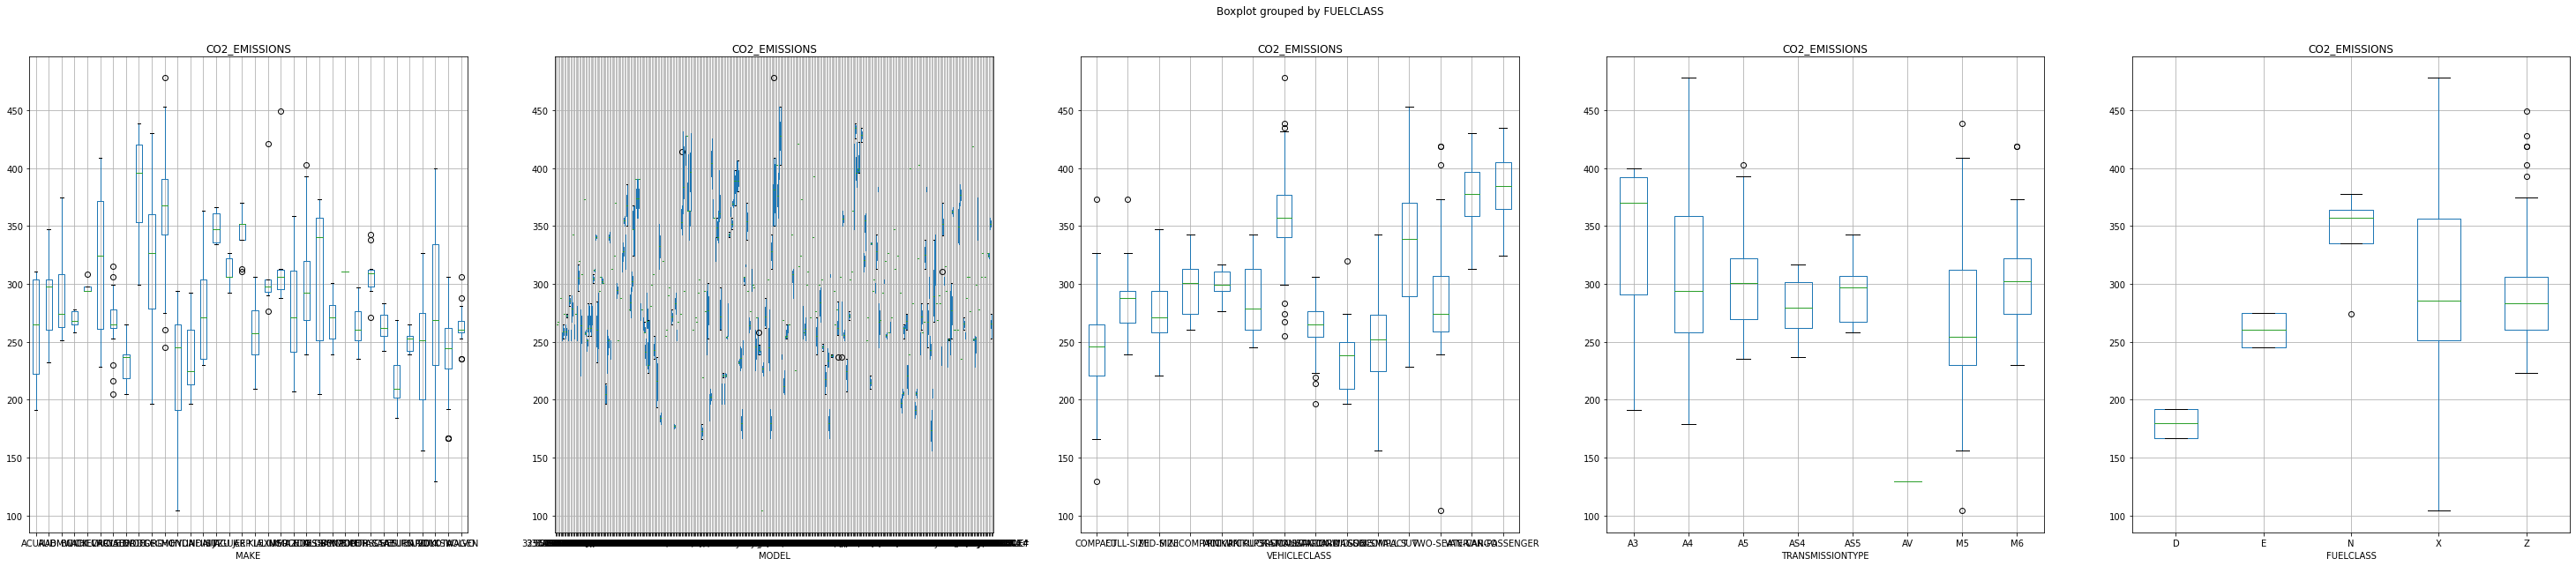

In [110]:
CategoricalColsList=['MAKE', 'MODEL', 'VEHICLECLASS',
       'TRANSMISSIONTYPE', 'FUELCLASS']
newfunction.PlotBoxPlots(inputable=carEmission, 
                     CategoricalColsList=CategoricalColsList,col='CO2_EMISSIONS')

<b>SOME STATISTICAL TESTS</b>

continous vs continous columns correlation-<b>Correlation matrix</b>

In [94]:
# Calculating correlation matrix
ContinuousCols=['ENGINE_SIZE', 'CYLINDERS','FUEL_CONSUMPTION',
       'ADDITIONALFUELCONSUMPTIONI', 'ADDITIONALFUELCONSUMPTIONII',
       'ADDITIONALFUELCONSUMPTIONIII', 'CO2_EMISSIONS']

# Creating the correlation matrix
CorrelationData=carEmission[ContinuousCols].corr()
CorrelationData

,ENGINE_SIZE,CYLINDERS,FUEL_CONSUMPTION,ADDITIONALFUELCONSUMPTIONI,ADDITIONALFUELCONSUMPTIONII,ADDITIONALFUELCONSUMPTIONIII,CO2_EMISSIONS
ENGINE_SIZE,1.000000,0.897588,0.861589,0.766144,0.837320,-0.762632,0.850551
CYLINDERS,0.897588,1.000000,0.765717,0.648585,0.731138,-0.689323,0.746058
FUEL_CONSUMPTION,0.861589,0.765717,1.000000,0.935531,0.990008,-0.938364,0.974848
ADDITIONALFUELCONSUMPTIONI,0.766144,0.648585,0.935531,1.000000,0.975774,-0.904321,0.960852
ADDITIONALFUELCONSUMPTIONII,0.837320,0.731138,0.990008,0.975774,1.000000,-0.939534,0.984805
ADDITIONALFUELCONSUMPTIONIII,-0.762632,-0.689323,-0.938364,-0.904321,-0.939534,1.000000,-0.923501
CO2_EMISSIONS,0.850551,0.746058,0.974848,0.960852,0.984805,-0.923501,1.000000


In [101]:
CorrelationData['CO2_EMISSIONS'][abs(CorrelationData['CO2_EMISSIONS']) > 0.5 ]

ENGINE_SIZE                     0.850551
CYLINDERS                       0.746058
FUEL_CONSUMPTION                0.974848
ADDITIONALFUELCONSUMPTIONI      0.960852
ADDITIONALFUELCONSUMPTIONII     0.984805
ADDITIONALFUELCONSUMPTIONIII   -0.923501
CO2_EMISSIONS                   1.000000
Name: CO2_EMISSIONS, dtype: float64

continous vs categorical columns correlation-<b>ANOVA test</b>

In [103]:
CategoricalPredictorList=['MAKE', 'MODEL', 'VEHICLECLASS',
       'TRANSMISSIONTYPE', 'FUELCLASS']
newfunction.FunctionAnova(inpData=carEmission, 
              TargetVariable='CO2_EMISSIONS', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

MAKE is correlated with CO2_EMISSIONS | P-Value: 5.675567252723017e-75
MODEL is correlated with CO2_EMISSIONS | P-Value: 4.73331217188177e-132
VEHICLECLASS is correlated with CO2_EMISSIONS | P-Value: 6.884480905985427e-119
TRANSMISSIONTYPE is correlated with CO2_EMISSIONS | P-Value: 2.77573908595658e-10
FUELCLASS is correlated with CO2_EMISSIONS | P-Value: 5.353436090261684e-06


['MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSIONTYPE', 'FUELCLASS']

<b>We have very high correlation values for the data variables so PCA should be implemented before running any ML Algorithm.</b>

# Selecting final predictors for Machine Learning

In [111]:
SelectedColumns=['MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINE_SIZE', 'CYLINDERS',
       'TRANSMISSIONTYPE', 'FUELCLASS', 'FUEL_CONSUMPTION',
       'ADDITIONALFUELCONSUMPTIONI', 'ADDITIONALFUELCONSUMPTIONII',
       'ADDITIONALFUELCONSUMPTIONIII']

# Selecting final columns
DataForML=carEmission[SelectedColumns]
DataForML.head()

,MAKE,MODEL,VEHICLECLASS,ENGINE_SIZE,CYLINDERS,TRANSMISSIONTYPE,FUELCLASS,FUEL_CONSUMPTION,ADDITIONALFUELCONSUMPTIONI,ADDITIONALFUELCONSUMPTIONII,ADDITIONALFUELCONSUMPTIONIII
0,ACURA,1.7EL,COMPACT,1.7,4,A4,X,9.3,7.2,8.3,34
1,ACURA,1.7EL,COMPACT,1.7,4,M5,X,8.9,7.4,8.3,34
2,ACURA,3.2CL,COMPACT,3.2,6,AS5,Z,13.7,8.8,11.5,25
3,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.8,8.8,11.6,24
4,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,10.9,13.1,22


## Data Pre-processing for Machine Learning
List of steps performed on predictor variables before data can be used for machine learning
1. Converting each Ordinal Categorical columns to numeric
2. Converting Binary nominal Categorical columns to numeric using 1/0 mapping
3. Converting all other nominal categorical columns to numeric using pd.get_dummies()
4. Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks

In [113]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['CO2_EMISSIONS']=carEmission['CO2_EMISSIONS']

# Printing sample rows
DataForML_Numeric.head()

,ENGINE_SIZE,CYLINDERS,FUEL_CONSUMPTION,ADDITIONALFUELCONSUMPTIONI,ADDITIONALFUELCONSUMPTIONII,ADDITIONALFUELCONSUMPTIONIII,MAKE_ACURA,MAKE_AUDI,MAKE_BMW,MAKE_BUICK,MAKE_CADILLAC,MAKE_CHEVROLET,MAKE_CHRYSLER,MAKE_DAEWOO,MAKE_DODGE,...,VEHICLECLASS_VAN-PASSENGER,TRANSMISSIONTYPE_A3,TRANSMISSIONTYPE_A4,TRANSMISSIONTYPE_A5,TRANSMISSIONTYPE_AS4,TRANSMISSIONTYPE_AS5,TRANSMISSIONTYPE_AV,TRANSMISSIONTYPE_M5,TRANSMISSIONTYPE_M6,FUELCLASS_D,FUELCLASS_E,FUELCLASS_N,FUELCLASS_X,FUELCLASS_Z,CO2_EMISSIONS
0,1.7,4,9.3,7.2,8.3,34,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,191
1,1.7,4,8.9,7.4,8.3,34,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,191
2,3.2,6,13.7,8.8,11.5,25,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,265
3,3.2,6,13.8,8.8,11.6,24,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,267
4,3.5,6,15.0,10.9,13.1,22,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,301


<b><big>PCA on the dataset<big><b>

as the data contains significant number of correlated predictor variables so applying PCA is mandatory!

In [191]:
# Keeping the target variable for future reference
TargetVariable=DataForML_Numeric['CO2_EMISSIONS']

# Dropping the target variable to get only predictors
# We will apply PCA only on the predictors
OnlyPredictors=DataForML_Numeric.drop('CO2_EMISSIONS', axis=1)

OnlyPredictors.head()

,ENGINE_SIZE,CYLINDERS,FUEL_CONSUMPTION,ADDITIONALFUELCONSUMPTIONI,ADDITIONALFUELCONSUMPTIONII,ADDITIONALFUELCONSUMPTIONIII,MAKE_ACURA,MAKE_AUDI,MAKE_BMW,MAKE_BUICK,MAKE_CADILLAC,MAKE_CHEVROLET,MAKE_CHRYSLER,MAKE_DAEWOO,MAKE_DODGE,...,VEHICLECLASS_VAN-CARGO,VEHICLECLASS_VAN-PASSENGER,TRANSMISSIONTYPE_A3,TRANSMISSIONTYPE_A4,TRANSMISSIONTYPE_A5,TRANSMISSIONTYPE_AS4,TRANSMISSIONTYPE_AS5,TRANSMISSIONTYPE_AV,TRANSMISSIONTYPE_M5,TRANSMISSIONTYPE_M6,FUELCLASS_D,FUELCLASS_E,FUELCLASS_N,FUELCLASS_X,FUELCLASS_Z
0,1.7,4,9.3,7.2,8.3,34,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,1.7,4,8.9,7.4,8.3,34,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3.2,6,13.7,8.8,11.5,25,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,3.2,6,13.8,8.8,11.6,24,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,3.5,6,15.0,10.9,13.1,22,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [192]:
# Extracting the target variable array y and Predictor variables array X
y = TargetVariable.values
X = OnlyPredictors.values


# Printing top 10 sample values
#print(X[0:10])
#print(y[0:10])

### Sandardization of data ###
#from sklearn.preprocessing import StandardScaler, MinMaxScaler
#PredictorScaler=MinMaxScaler()
#PredictorScalerFit=PredictorScaler.fit(X)
#X=PredictorScalerFit.transform(X)

print(X[0:10])
print(y[0:10])

[[ 1.7  4.   9.3 ...  0.   1.   0. ]
 [ 1.7  4.   8.9 ...  0.   1.   0. ]
 [ 3.2  6.  13.7 ...  0.   0.   1. ]
 ...
 [ 1.8  4.  10.8 ...  0.   0.   1. ]
 [ 3.5  6.  15.5 ...  0.   0.   1. ]
 [ 3.   6.  15.3 ...  0.   0.   1. ]]
[191 191 265 267 301 232 221 223 311 306]


In [193]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [195]:
# Creating maximum components equal to the total number of columns to analyze all of them
pca = PCA(n_components=418)

# fitting the data
pca_fit=pca.fit(X)

# calculating the principal components
reduced_X = pca_fit.transform(X)

#4 Columns present in X are now represented by 418 Principal components present in reduced_X
print(np.round(reduced_X[0:4],2))

[[13.49  1.28  0.91 ... -0.   -0.   -0.  ]
 [13.62  1.12  0.97 ... -0.   -0.   -0.  ]
 [ 2.82  0.26 -1.4  ...  0.    0.   -0.  ]
 [ 1.99 -0.27 -1.72 ...  0.   -0.   -0.  ]]


In [196]:
# The Amount of variance explained by each principle componnent
var_explained= pca.explained_variance_ratio_
print(np.round(var_explained,2))

# The first component and second component explain 92% and 5% variance of data respectively

[0.87 0.03 0.02 0.01 0.01 0.01 0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0. 

In [198]:
#Cumulative Variance explained by each component
var_explained_cumulative=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var_explained_cumulative)

[ 87.31  90.55  92.95  93.83  94.44  94.95  95.25  95.51  95.74  95.94
  96.12  96.27  96.41  96.54  96.66  96.77  96.88  96.98  97.07  97.16
  97.24  97.31  97.38  97.45  97.51  97.57  97.63  97.69  97.74  97.79
  97.84  97.88  97.92  97.96  98.    98.04  98.08  98.12  98.15  98.18
  98.21  98.24  98.27  98.3   98.33  98.36  98.38  98.4   98.42  98.44
  98.46  98.48  98.5   98.52  98.54  98.56  98.58  98.59  98.6   98.61
  98.62  98.63  98.64  98.65  98.66  98.67  98.68  98.69  98.7   98.71
  98.72  98.73  98.74  98.75  98.76  98.77  98.78  98.79  98.8   98.81
  98.82  98.83  98.84  98.85  98.86  98.87  98.88  98.89  98.9   98.91
  98.92  98.93  98.94  98.95  98.96  98.97  98.98  98.99  99.    99.01
  99.02  99.03  99.04  99.05  99.06  99.07  99.08  99.09  99.1   99.11
  99.12  99.13  99.14  99.15  99.16  99.17  99.18  99.19  99.2   99.21
  99.22  99.23  99.24  99.25  99.26  99.27  99.28  99.29  99.3   99.31
  99.32  99.33  99.34  99.35  99.36  99.37  99.38  99.39  99.4   99.41
  99.4

Text(0, 0.5, '% Variance explained')

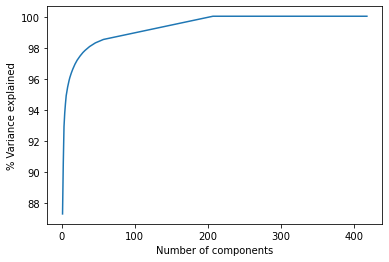

In [199]:
# By Looking at below graph we can see that 3 components are explaining maximum Variance in the dataset
# The elbow occurs at 3rd principal component
plt.plot( range(1,419), var_explained_cumulative )
plt.xlabel('Number of components')
plt.ylabel('% Variance explained')

In [200]:
# Choosing 3-principal components based on above graph
pca = PCA(n_components=215)

# fitting the data
pca_fit=pca.fit(X)

# calculating the principal components
reduced_X = pca_fit.transform(X)

# Four Columns present in X are now represented by 3-Principal components present in reduced_X
print(np.round(reduced_X[0:10],2))

[[13.49  1.28  0.91 ... -0.05  0.06 -0.1 ]
 [13.62  1.12  0.97 ... -0.06  0.05 -0.1 ]
 [ 2.82  0.26 -1.4  ...  0.04  0.03  0.  ]
 ...
 [ 8.26 -0.58  0.19 ...  0.02 -0.06  0.06]
 [-2.42 -0.49 -0.64 ... -0.04  0.08  0.04]
 [-2.11 -0.81 -0.73 ... -0.02 -0.12  0.08]]


In [201]:
Reduceddata=pd.DataFrame(reduced_X, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10',
'PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20',
'PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30',
'PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40',
'PC41','PC42','PC43','PC44','PC45','PC46','PC47','PC48','PC49','PC50',
'PC51','PC52','PC53','PC54','PC55','PC56','PC57','PC58','PC59','PC60',
'PC61','PC62','PC63','PC64','PC65','PC66','PC67','PC68','PC69','PC70',
'PC71','PC72','PC73','PC74','PC75','PC76','PC77','PC78','PC79','PC80',
'PC81','PC82','PC83','PC84','PC85','PC86','PC87','PC88','PC89','PC90',
'PC91','PC92','PC93','PC94','PC95','PC96','PC97','PC98','PC99','PC100',
'PC101','PC102','PC103','PC104','PC105','PC106','PC107','PC108','PC109','PC110',
'PC111','PC112','PC113','PC114','PC115','PC116','PC117','PC118','PC119','PC120',
'PC121','PC122','PC123','PC124','PC125','PC126','PC127','PC128','PC129','PC130',
'PC131','PC132','PC133','PC134','PC135','PC136','PC137','PC138','PC139','PC140',
'PC141','PC142','PC143','PC144','PC145','PC146','PC147','PC148','PC149','PC150',
'PC151','PC152','PC153','PC154','PC155','PC156','PC157','PC158','PC159','PC160',
'PC161','PC162','PC163','PC164','PC165','PC166','PC167','P1C68','P1C69','PC170',
'PC171','PC172','PC173','PC174','PC175','PC176','PC177','PC178','PC179','PC180',
'PC181','PC182','PC183','PC184','PC185','PC186','PC187','PC188','PC189','PC190',
'PC191','PC192','PC193','PC194','PC195','PC196','PC197','PC198','PC199','PC200',
'PC201','PC202','PC203','PC204','PC205','PC206','PC207','PC208','PC209','PC210',
'PC211','PC212','PC213','PC214','PC215'])
Reduceddata['CO2_EMISSIONS']=y
Reduceddata.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,...,PC202,PC203,PC204,PC205,PC206,PC207,PC208,PC209,PC210,PC211,PC212,PC213,PC214,PC215,CO2_EMISSIONS
0,13.490873,1.284878,0.905206,-0.536102,-0.047510,-0.623350,0.559910,-0.053099,0.089227,-0.047308,0.066475,-0.013188,0.032247,-0.115782,-0.000676,...,-0.005075,0.098281,0.006894,-0.081781,0.056400,-0.058641,-0.067743,0.039004,0.025153,-0.007026,0.098622,-0.053818,0.064898,-0.100489,191
1,13.624480,1.118490,0.965647,0.100379,-0.736716,0.429031,0.445822,0.092090,0.088351,-0.131121,0.212315,0.023153,-0.064294,-0.109256,0.079833,...,-0.010232,0.091877,0.010279,-0.083597,0.057112,-0.052323,-0.065430,0.040179,0.027141,0.006127,0.101933,-0.058938,0.048558,-0.100251,191
2,2.823559,0.262352,-1.399948,0.492809,0.510784,-0.018976,0.517676,0.185606,0.408110,-0.082994,0.035926,0.096703,0.000068,-0.247004,-0.087574,...,0.007751,0.076807,-0.060377,0.036921,-0.033445,-0.080641,-0.014634,0.018823,0.013001,0.044567,0.007606,0.037509,0.034047,0.000524,265
3,1.986074,-0.269504,-1.722509,0.320612,0.537079,-0.047978,-0.545703,-0.105872,-0.228241,-0.386267,0.313451,0.135578,-0.014004,-0.208462,-0.036415,...,-0.000820,0.062506,-0.033904,0.012076,-0.004885,-0.053133,-0.005396,0.040748,-0.062425,-0.001434,0.021831,0.038415,0.056165,-0.007276,267
4,-1.257506,-0.183988,-0.557140,0.147831,0.270712,-0.798862,-0.506503,-0.225098,0.024799,-0.686994,0.379915,0.293841,-0.172142,-0.055400,-0.133340,...,0.056484,0.030079,-0.036375,-0.025634,-0.023620,-0.003591,0.115833,-0.002242,-0.080370,0.004619,0.005615,0.073186,0.015491,-0.031649,301


In [209]:
OriginalDatanew=pca_fit.inverse_transform(reduced_X)
print(np.round(OriginalDatanew[0:10],2))

[[ 1.700e+00  4.000e+00  9.280e+00 ...  0.000e+00  1.000e+00 -1.000e-02]
 [ 1.700e+00  4.000e+00  8.930e+00 ...  0.000e+00  1.000e+00 -1.000e-02]
 [ 3.200e+00  6.000e+00  1.370e+01 ... -0.000e+00 -0.000e+00  1.000e+00]
 ...
 [ 1.800e+00  4.000e+00  1.078e+01 ... -1.000e-02 -0.000e+00  1.010e+00]
 [ 3.500e+00  6.000e+00  1.549e+01 ... -0.000e+00  0.000e+00  1.000e+00]
 [ 3.000e+00  6.000e+00  1.530e+01 ...  1.000e-02  0.000e+00  1.000e+00]]


In [210]:
print(np.round(X[0:10],2))

[[ 1.7  4.   9.3 ...  0.   1.   0. ]
 [ 1.7  4.   8.9 ...  0.   1.   0. ]
 [ 3.2  6.  13.7 ...  0.   0.   1. ]
 ...
 [ 1.8  4.  10.8 ...  0.   0.   1. ]
 [ 3.5  6.  15.5 ...  0.   0.   1. ]
 [ 3.   6.  15.3 ...  0.   0.   1. ]]


In [235]:
# Separate Target Variable and Predictor Variables
TargetVariable='CO2_EMISSIONS'
Predictors=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10',
'PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20',
'PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30',
'PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40',
'PC41','PC42','PC43','PC44','PC45','PC46','PC47','PC48','PC49','PC50',
'PC51','PC52','PC53','PC54','PC55','PC56','PC57','PC58','PC59','PC60',
'PC61','PC62','PC63','PC64','PC65','PC66','PC67','PC68','PC69','PC70',
'PC71','PC72','PC73','PC74','PC75','PC76','PC77','PC78','PC79','PC80',
'PC81','PC82','PC83','PC84','PC85','PC86','PC87','PC88','PC89','PC90',
'PC91','PC92','PC93','PC94','PC95','PC96','PC97','PC98','PC99','PC100',
'PC101','PC102','PC103','PC104','PC105','PC106','PC107','PC108','PC109','PC110',
'PC111','PC112','PC113','PC114','PC115','PC116','PC117','PC118','PC119','PC120',
'PC121','PC122','PC123','PC124','PC125','PC126','PC127','PC128','PC129','PC130',
'PC131','PC132','PC133','PC134','PC135','PC136','PC137','PC138','PC139','PC140',
'PC141','PC142','PC143','PC144','PC145','PC146','PC147','PC148','PC149','PC150',
'PC151','PC152','PC153','PC154','PC155','PC156','PC157','PC158','PC159','PC160',
'PC161','PC162','PC163','PC164','PC165','PC166','PC167','P1C68','P1C69','PC170',
'PC171','PC172','PC173','PC174','PC175','PC176','PC177','PC178','PC179','PC180',
'PC181','PC182','PC183','PC184','PC185','PC186','PC187','PC188','PC189','PC190',
'PC191','PC192','PC193','PC194','PC195','PC196','PC197','PC198','PC199','PC200',
'PC201','PC202','PC203','PC204','PC205','PC206','PC207','PC208','PC209','PC210',
'PC211','PC212','PC213','PC214','PC215']


X2=Reduceddata[Predictors].values
y2=Reduceddata[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=24)

In [206]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(475, 215)
(475,)
(204, 215)
(204,)


<b><h1 style="color:blue;">LinearRegression</h1><b><br/>

In [236]:
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()
print(RegModel)
LREG=RegModel.fit(X_train,y_train)
from sklearn import metrics

# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

test=metrics.r2_score(y_train, LREG.predict(X_train))
#test2=RegModel.score(X_train,y_train)
print("ajdusted r2",1 - (((1-test)*(len(y_train)-1))/(len(y_train)-X_train.shape[1]-1)))
#print("ajdusted r2'",1 - (((1-test2)*(len(y_train)-1))/(len(y_train)-X_train.shape[1]-1)))

print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
prediction=LREG.predict(X_test)
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+ " " +TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+' '+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['CO2_EMISSIONS']-TestingDataResults['Predicted CO2_EMISSIONS']))/TestingDataResults['CO2_EMISSIONS'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X_train,y_train, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 5-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))



LinearRegression()
R2 Value: 0.998128057887068
ajdusted r2 0.9965741291060628

##### Model Validation and Accuracy Calculations ##########
   CO2_EMISSIONS  Predicted CO2_EMISSIONS
0            205                    206.0
1            384                    384.0
2            228                    228.0
3            184                    186.0
4            253                    252.0
Mean Accuracy on test data: 97.69484292516611
Median Accuracy on test data: 99.26917416383792

Accuracy values for 5-fold Cross Validation:
 [97.02521147 95.95131026 95.43234546 98.04973891 96.19317417 93.54259391
 97.82225619 97.04635471 94.66341785 97.39521788]

Final Average Accuracy of the model: 96.31


<b><h1 style="color:blue;">DecisionTreeRegressor</h1><b><br/>

DecisionTreeRegressor(max_depth=5)
R2 Value: 0.9943873784521439
ajdusted r2 0.9897282524568193

##### Model Validation and Accuracy Calculations ##########
   CO2_EMISSIONS  Predicted CO2_EMISSIONS
0            361                    356.0
1            269                    272.0
2            299                    295.0
3            191                    194.0
4            340                    356.0
Mean Accuracy on test data: 97.3945239804088
Median Accuracy on test data: 98.88475836431226

Accuracy values for 5-fold Cross Validation:
 [98.34613892 98.66885837 98.99090073 98.4259507  98.66981557 97.64875777
 98.69018759 98.44547517 98.78018643 98.41348904]

Final Average Accuracy of the model: 98.51

 Plotting the feature importance for Top 10 most important columns


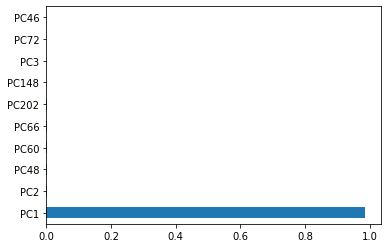

In [231]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)


from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

testdec=metrics.r2_score(y_train, DT.predict(X_train))
print("ajdusted r2",1 - (((1-testdec)*(len(y_train)-1))/(len(y_train)-X_train.shape[1]-1)))



%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
prediction=DT.predict(X_test)
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+ " " +TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+' '+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['CO2_EMISSIONS']-TestingDataResults['Predicted CO2_EMISSIONS']))/TestingDataResults['CO2_EMISSIONS'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X_train,y_train, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 5-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

print("\n Plotting the feature importance for Top 10 most important columns")

<b><h1 style="color:blue;">RandomForestRegressor</h1><b><br/>

RandomForestRegressor(max_depth=3)
R2 Value: 0.9823692045549384

##### Model Validation and Accuracy Calculations ##########
   CO2_EMISSIONS  PredictedCO2_EMISSIONS
0            361                   361.0
1            269                   266.0
2            299                   294.0
3            191                   191.0
4            340                   348.0
Mean Accuracy on test data: 97.04814032281271
Median Accuracy on test data: 98.72340425531915

Accuracy values for 10-fold Cross Validation:
 [97.96751937 98.36439175 98.44554302 98.27047507 98.34820522 96.86701178
 98.20829409 98.37281948 98.31031423 98.24500924]

Final Average Accuracy of the model: 98.14


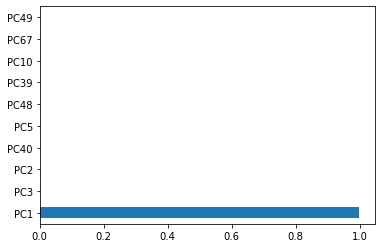

In [232]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=3, n_estimators=100,criterion='mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['CO2_EMISSIONS']-TestingDataResults['PredictedCO2_EMISSIONS']))/TestingDataResults['CO2_EMISSIONS'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X_train,y_train, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

<b><h1 style="color:blue;">K-Nearest Neighbor(KNN)</h1><b><br/>

In [233]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['CO2_EMISSIONS']-TestingDataResults['PredictedCO2_EMISSIONS']))/TestingDataResults['CO2_EMISSIONS'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X_train,y_train, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.9917631444185568

##### Model Validation and Accuracy Calculations ##########
   CO2_EMISSIONS  PredictedCO2_EMISSIONS
0            361                   355.0
1            269                   264.0
2            299                   304.0
3            191                   192.0
4            340                   343.0
Mean Accuracy on test data: 97.54403943046435
Median Accuracy on test data: 98.99015217816145

Accuracy values for 10-fold Cross Validation:
 [98.47822001 98.64439638 98.6034445  98.48525877 98.61799344 97.55700941
 99.01491454 98.52047668 98.64803046 98.57932679]

Final Average Accuracy of the model: 98.51
